<h3> Installing and Filtering the Dataset

In [31]:
# !pip install palmerpenguins

<h3> Importing important Libraries


In [32]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Loading

The Palmer Penguins dataset is loaded using the `palmerpenguins` library.


In [33]:
from palmerpenguins import load_penguins

penguins = load_penguins()

### Data Filtering

The dataset is filtered to include only two species of penguins: Adelie and Gentoo. Missing values are then dropped.



In [34]:
penguins_filtered_data = penguins[(penguins['species'] == 'Adelie') | (penguins['species'] == 'Gentoo')]
penguins_filtered_data.dropna(inplace=True)
penguins_filtered_data.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


### Data Encoding

The species column is mapped to binary values, and categorical variables are encoded for model compatibility.



In [35]:
penguins_filtered_data['species'] = penguins_filtered_data['species'].map({'Adelie': 0, 'Gentoo': 1})
label_encoder = LabelEncoder()
penguins_filtered_data['island'] = label_encoder.fit_transform(penguins_filtered_data['island'])
penguins_filtered_data['sex'] = label_encoder.fit_transform(penguins_filtered_data['sex'])

### Train-Test Split

The dataset is split into training and test sets to prepare it for model training and evaluation.



In [36]:
X = penguins_filtered_data.drop('species', axis=1)
y = penguins_filtered_data['species']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training size: {X_train.shape}, Test size: {X_test.shape}")


Training size: (212, 7), Test size: (53, 7)


## 1. Accuracy Comparison

### Task
The goal is to evaluate and compare the accuracy of the Naive Bayes and Logistic Regression models on the training and test datasets. This will help determine which model better distinguishes between the two penguin species.

### Observations
1. **Naive Bayes**:
   - **Training Accuracy**: 100%
   - **Test Accuracy**: 100%

2. **Logistic Regression**:
   - **Training Accuracy**: 100%
   - **Test Accuracy**: 100%

In [37]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions
nb_preds_train = nb_model.predict(X_train)
nb_preds_test = nb_model.predict(X_test)
lr_preds_train = lr_model.predict(X_train)
lr_preds_test = lr_model.predict(X_test)

# Evaluate accuracy
nb_train_acc = accuracy_score(y_train, nb_preds_train)
nb_test_acc = accuracy_score(y_test, nb_preds_test)
lr_train_acc = accuracy_score(y_train, lr_preds_train)
lr_test_acc = accuracy_score(y_test, lr_preds_test)

print(f"Naive Bayes - Train Accuracy: {nb_train_acc:.2f}, Test Accuracy: {nb_test_acc:.2f}")
print(f"Logistic Regression - Train Accuracy: {lr_train_acc:.2f}, Test Accuracy: {lr_test_acc:.2f}")


Naive Bayes - Train Accuracy: 1.00, Test Accuracy: 1.00
Logistic Regression - Train Accuracy: 1.00, Test Accuracy: 1.00




### Analysis
- Both models achieved perfect accuracy on both the training and test datasets. This suggests that the dataset is likely simple enough for both models to perfectly separate the two classes (penguin species).
- However, such high accuracy might also indicate potential overfitting or a dataset with highly separable features.

### Conclusion
- In this case, **both Naive Bayes and Logistic Regression perform equally well** in terms of accuracy. To further differentiate the performance of these models, we can analyze other metrics, such as the Area Under the ROC Curve (AUC), Lift, and Gain charts.


## 2. AUC (Area Under the ROC Curve) Comparison

### Task
Evaluate the AUC for both the Naive Bayes and Logistic Regression models and interpret the results to assess the effectiveness of these models in distinguishing between the two penguin species.


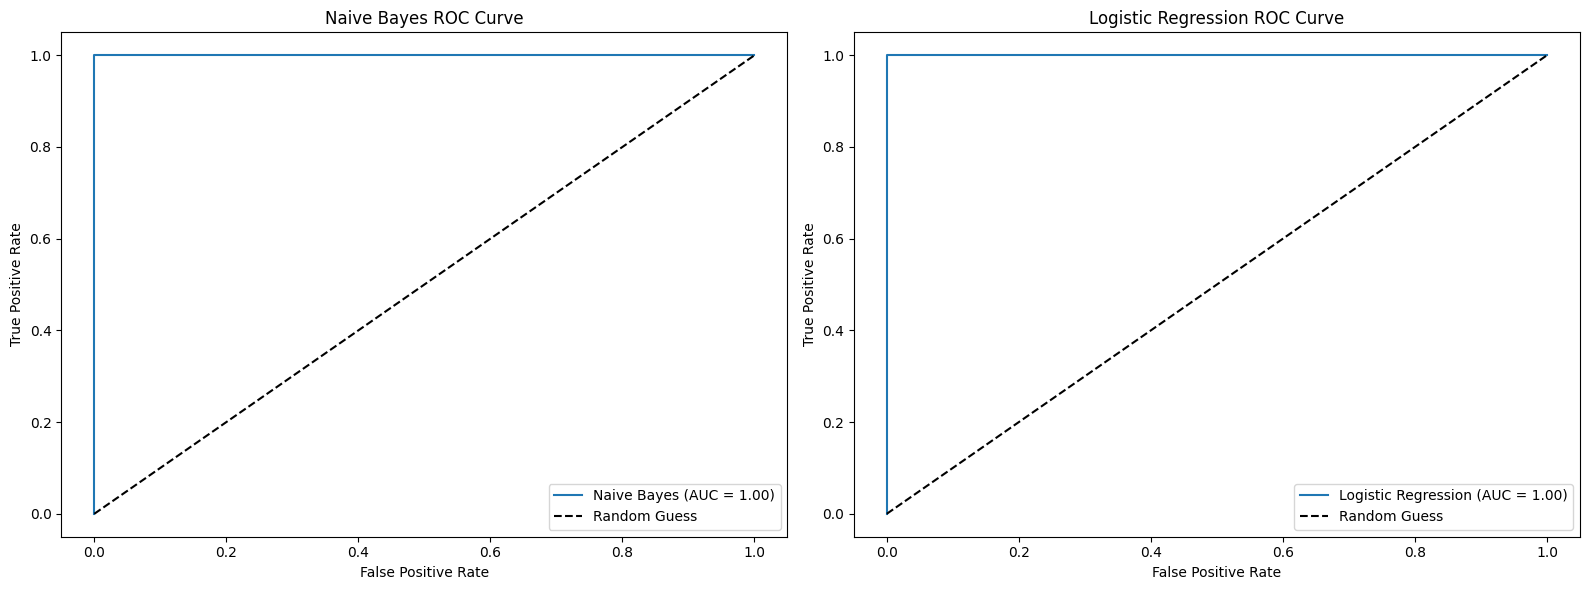

In [38]:
# Predicted probabilities for AUC
nb_probs = nb_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_auc = auc(nb_fpr, nb_tpr)
lr_auc = auc(lr_fpr, lr_tpr)

# Plot ROC curves
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Naive Bayes ROC Curve
axes[0].plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.2f})")
axes[0].plot([0, 1], [0, 1], 'k--', label="Random Guess")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("Naive Bayes ROC Curve")
axes[0].legend()

# Logistic Regression ROC Curve
axes[1].plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})")
axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guess")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("Logistic Regression ROC Curve")
axes[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### Observations
1. **Naive Bayes**:
   - AUC: **1.00** (Perfect separation of classes with no overlap between false positives and true positives).

2. **Logistic Regression**:
   - AUC: **1.00** (ROC curve also shows perfect performance similar to Naive Bayes).

### Interpretation
- Both models achieve an AUC of 1.00, indicating perfect discrimination between the two penguin species (Adelie and Gentoo).
- The ROC curves are identical, showing a TPR of 1.0 for all FPR values.

### Insights
- Both models perform equally well with perfect AUC, consistent with the accuracy results.
- AUC of 1.00 suggests the dataset is highly separable based on the features.

### Conclusion
Naive Bayes and Logistic Regression are equally effective based on the AUC metric. To explore further differences, Lift and Gain charts may provide additional insights.


## 3. Lift and Gain Charts

### Task
The objective is to evaluate the performance of the Naive Bayes and Logistic Regression models by generating Lift and Gain charts using 10 deciles. These charts help understand how well the models rank the predicted probabilities and their effectiveness in prioritizing the classification of the two penguin species.


In [82]:
# # Lift and Gain Charts
# def calculate_lift_gain(probs, true_labels):
#     df = pd.DataFrame({'probs': probs, 'true': true_labels})
#     df['decile'] = pd.qcut(df['probs'], 10, labels=False, duplicates='drop')
#     gain, lift = [], []
#     total_positives = df['true'].sum()
#     for decile in range(df['decile'].nunique()):
#         group = df[df['decile'] == decile]
#         positives = group['true'].sum()
#         gain.append(positives / total_positives)
#         lift.append(positives / len(group) if len(group) > 0 else 0)
#     return np.cumsum(gain), lift
def calculate_lift_gain(y_proba, y_true, n_bins=10):
    """
    Computes Lift and Gain data for the given probabilities and true labels.

    Args:
        y_proba (array-like): Predicted probabilities.
        y_true (array-like): True binary labels.
        n_bins (int): Number of deciles to split the data into.

    Returns:
        pd.DataFrame: A DataFrame containing decile, gain, and lift values.
    """
    df = pd.DataFrame({'true_label': y_true, 'pred_proba': y_proba})
    df.sort_values('pred_proba', ascending=False, inplace=True)

    # Use qcut or fallback to cut for handling low variability
    try:
        df['decile'] = pd.qcut(df['pred_proba'], q=n_bins, labels=False, duplicates='drop')
    except ValueError:
        print("Warning: Insufficient variability in probabilities. Using fixed-interval bins.")
        df['decile'] = pd.cut(df['pred_proba'], bins=n_bins, labels=False, include_lowest=True)

    grouped = df.groupby('decile')
    total_positives = df['true_label'].sum()

    lift_gain_data = []
    cum_positives = 0

    for decile, group in grouped:
        positives = group['true_label'].sum()
        gain = (cum_positives + positives) / total_positives if total_positives > 0 else 0
        lift = gain / ((decile + 1) / n_bins) if (decile + 1) > 0 else 0
        cum_positives += positives
        lift_gain_data.append({'decile': decile + 1, 'gain': gain, 'lift': lift})

    return pd.DataFrame(lift_gain_data)



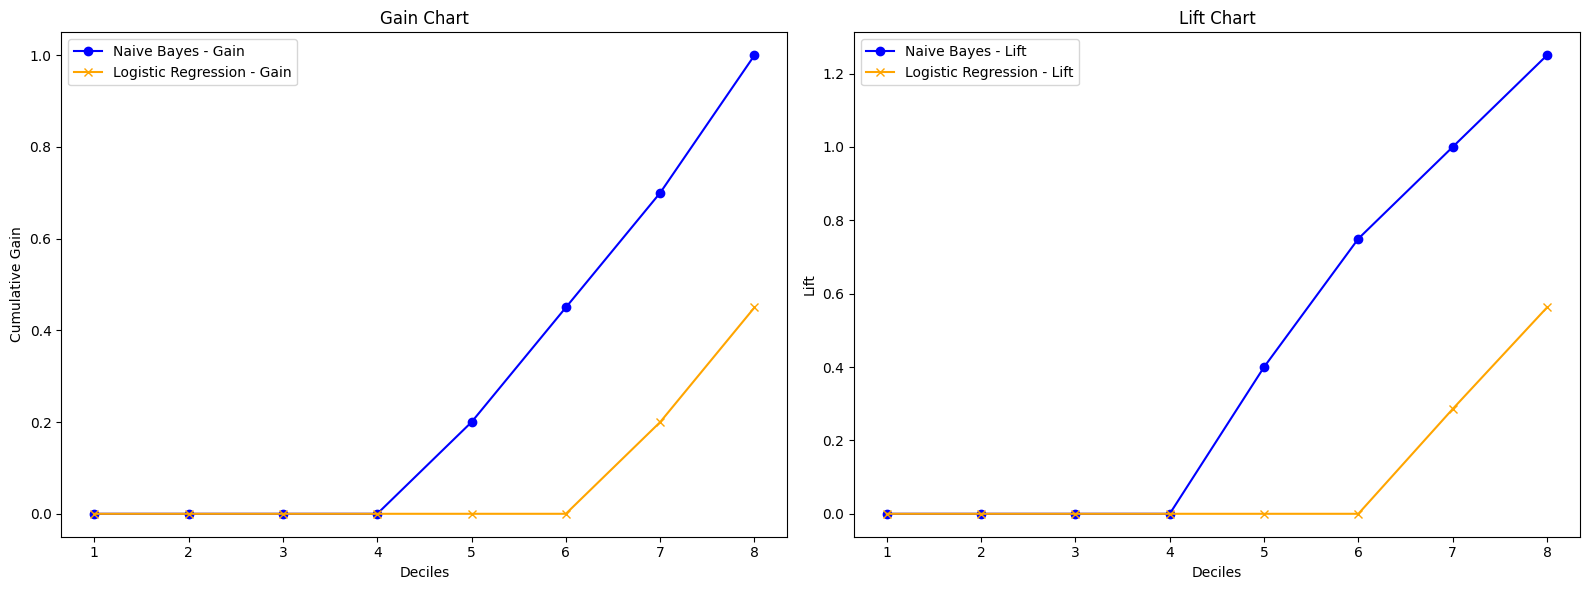

In [83]:
# Calculate Lift and Gain for both models
nb_lift_gain_df = calculate_lift_gain(nb_probs, y_test)  # Single DataFrame return
lr_lift_gain_df = calculate_lift_gain(lr_probs, y_test)  # Single DataFrame return

# Extract Gain and Lift from DataFrames
nb_gain = nb_lift_gain_df['gain'].values
nb_lift = nb_lift_gain_df['lift'].values
lr_gain = lr_lift_gain_df['gain'].values
lr_lift = lr_lift_gain_df['lift'].values

# Adjust deciles dynamically based on the minimum length
min_len = min(len(nb_gain), len(lr_gain))  # Get the minimum length between nb_gain and lr_gain
deciles = np.arange(1, min_len + 1)  # Adjust deciles based on min_len

# Plot the Gain and Lift charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gain Chart
axes[0].plot(deciles, nb_gain[:min_len], marker='o', label="Naive Bayes - Gain", color="blue")
axes[0].plot(deciles, lr_gain[:min_len], marker='x', label="Logistic Regression - Gain", color="orange")
axes[0].set_xlabel("Deciles")
axes[0].set_ylabel("Cumulative Gain")
axes[0].set_title("Gain Chart")
axes[0].legend()

# Lift Chart
axes[1].plot(deciles, nb_lift[:min_len], marker='o', label="Naive Bayes - Lift", color="blue")
axes[1].plot(deciles, lr_lift[:min_len], marker='x', label="Logistic Regression - Lift", color="orange")
axes[1].set_xlabel("Deciles")
axes[1].set_ylabel("Lift")
axes[1].set_title("Lift Chart")
axes[1].legend()

# Show the combined plot
plt.tight_layout()
plt.show()


### Observations and Interpretation

1. **Gain Chart**:
   - **Naive Bayes**: Captures a larger proportion of the positive class (Gentoo species) in the earlier deciles, as indicated by the steep curve.
   - **Logistic Regression**: Captures positives more slowly, with a less steep rise in the curve.

2. **Lift Chart**:
   - **Naive Bayes**: Achieves higher lift in the early deciles, showing stronger prioritization of positive cases.
   - **Logistic Regression**: Lower lift values indicate weaker prioritization.

### Conclusion
Naive Bayes outperforms Logistic Regression in ranking and prioritizing the positive  class, as shown by its superior Gain and Lift charts.








In [86]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features and target
X_mnist, y_mnist = mnist.data, mnist.target.astype(int)

# Scale data to [0, 1] for compatibility with models
scaler = MinMaxScaler()
X_mnist = scaler.fit_transform(X_mnist)

# Binary classification: Filter digits '0' and '1' for comparison
mnist_filtered_data = (y_mnist == 0) | (y_mnist == 1)
X_mnist, y_mnist = X_mnist[mnist_filtered_data], y_mnist[mnist_filtered_data]

# Train-test split
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

In [87]:
y_mnist.value_counts()

,count
class,
1,7877
0,6903


<h3> Looks like a balanced data

In [88]:
# Train Naive Bayes on MNIST
nb_model_mnist = GaussianNB()
nb_model_mnist.fit(X_train_mnist, y_train_mnist)

# Train Logistic Regression on MNIST
lr_model_mnist = LogisticRegression(max_iter=1000)
lr_model_mnist.fit(X_train_mnist, y_train_mnist)

# Predictions
nb_preds_mnist = nb_model_mnist.predict(X_test_mnist)
lr_preds_mnist = lr_model_mnist.predict(X_test_mnist)

# Evaluate Accuracy
nb_acc_mnist = accuracy_score(y_test_mnist, nb_preds_mnist)
lr_acc_mnist = accuracy_score(y_test_mnist, lr_preds_mnist)

print(f"Naive Bayes Accuracy on MNIST: {nb_acc_mnist:.2f}")
print(f"Logistic Regression Accuracy on MNIST: {lr_acc_mnist:.2f}")


Naive Bayes Accuracy on MNIST: 0.98
Logistic Regression Accuracy on MNIST: 1.00


In [89]:
# Predicted probabilities for AUC
nb_probs_mnist = nb_model_mnist.predict_proba(X_test_mnist)[:, 1]
lr_probs_mnist = lr_model_mnist.predict_proba(X_test_mnist)[:, 1]

# Compute AUC
nb_auc_mnist = roc_auc_score(y_test_mnist, nb_probs_mnist)
lr_auc_mnist = roc_auc_score(y_test_mnist, lr_probs_mnist)

print(f"Naive Bayes AUC on MNIST: {nb_auc_mnist:.2f}")
print(f"Logistic Regression AUC on MNIST: {lr_auc_mnist:.2f}")


Naive Bayes AUC on MNIST: 0.99
Logistic Regression AUC on MNIST: 1.00


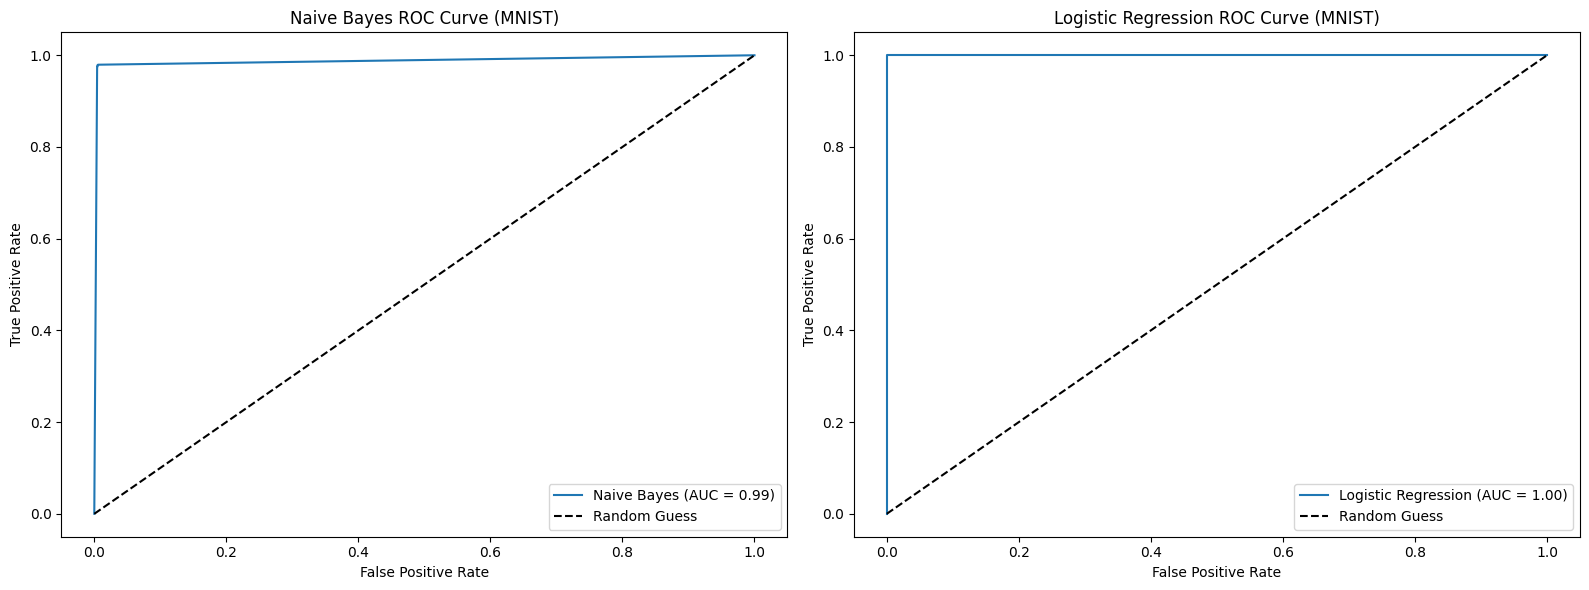

In [90]:
# Predicted probabilities for AUC (MNIST)
nb_probs_mnist = nb_model_mnist.predict_proba(X_test_mnist)[:, 1]
lr_probs_mnist = lr_model_mnist.predict_proba(X_test_mnist)[:, 1]

# Compute ROC curve and AUC for MNIST
nb_fpr_mnist, nb_tpr_mnist, _ = roc_curve(y_test_mnist, nb_probs_mnist)
lr_fpr_mnist, lr_tpr_mnist, _ = roc_curve(y_test_mnist, lr_probs_mnist)
nb_auc_mnist = auc(nb_fpr_mnist, nb_tpr_mnist)
lr_auc_mnist = auc(lr_fpr_mnist, lr_tpr_mnist)

# Plot ROC curves for MNIST
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Naive Bayes ROC Curve (MNIST)
axes[0].plot(nb_fpr_mnist, nb_tpr_mnist, label=f"Naive Bayes (AUC = {nb_auc_mnist:.2f})")
axes[0].plot([0, 1], [0, 1], 'k--', label="Random Guess")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("Naive Bayes ROC Curve (MNIST)")
axes[0].legend()

# Logistic Regression ROC Curve (MNIST)
axes[1].plot(lr_fpr_mnist, lr_tpr_mnist, label=f"Logistic Regression (AUC = {lr_auc_mnist:.2f})")
axes[1].plot([0, 1], [0, 1], 'k--', label="Random Guess")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("Logistic Regression ROC Curve (MNIST)")
axes[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


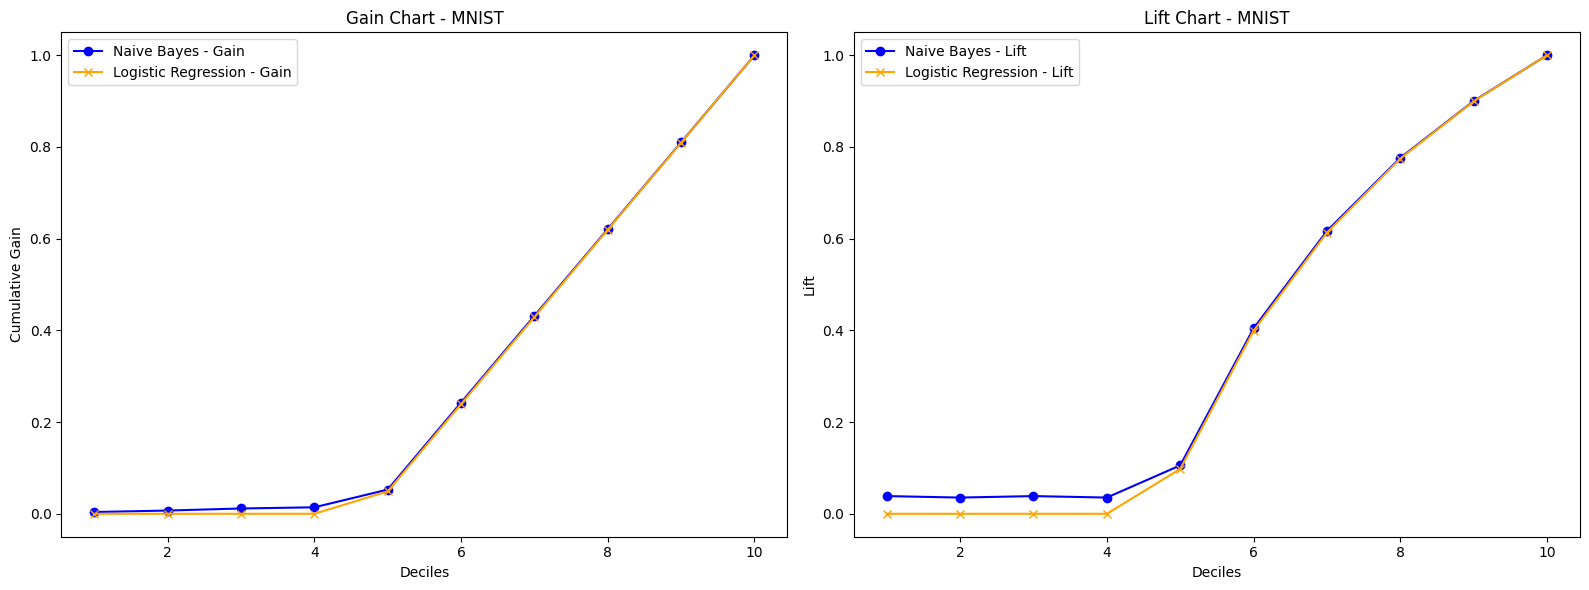

In [96]:
def calculate_lift_gain(y_proba, y_true, n_bins=10):
    df = pd.DataFrame({'true_label': y_true, 'pred_proba': y_proba})

    # Rank probabilities to handle low variability
    df['ranked_probs'] = df['pred_proba'].rank(method='first')
    df['decile'] = pd.qcut(df['ranked_probs'], q=n_bins, labels=False, duplicates='drop')

    grouped = df.groupby('decile')
    total_positives = df['true_label'].sum()

    lift_gain_data = []
    cum_positives = 0

    for decile, group in grouped:
        positives = group['true_label'].sum()
        gain = (cum_positives + positives) / total_positives if total_positives > 0 else 0
        lift = gain / ((decile + 1) / n_bins) if (decile + 1) > 0 else 0
        cum_positives += positives
        lift_gain_data.append({'decile': decile + 1, 'gain': gain, 'lift': lift})

    return pd.DataFrame(lift_gain_data)
# Calculate Lift and Gain for both models
nb_lift_gain_df = calculate_lift_gain(nb_probs_mnist, y_test_mnist)
lr_lift_gain_df = calculate_lift_gain(lr_probs_mnist, y_test_mnist)

# Extract Gain and Lift
nb_gain_mnist = nb_lift_gain_df['gain'].values
nb_lift_mnist = nb_lift_gain_df['lift'].values
lr_gain_mnist = lr_lift_gain_df['gain'].values
lr_lift_mnist = lr_lift_gain_df['lift'].values

# Plot Gain Chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a figure with 1 row and 2 columns

# Gain Chart
axes[0].plot(deciles, nb_gain_mnist[:min_len], label="Naive Bayes - Gain", marker='o', color='blue')
axes[0].plot(deciles, lr_gain_mnist[:min_len], label="Logistic Regression - Gain", marker='x', color='orange')
axes[0].set_xlabel("Deciles")
axes[0].set_ylabel("Cumulative Gain")
axes[0].set_title("Gain Chart - MNIST")
axes[0].legend()

# Lift Chart
axes[1].plot(deciles, nb_lift_mnist[:min_len], label="Naive Bayes - Lift", marker='o', color='blue')
axes[1].plot(deciles, lr_lift_mnist[:min_len], label="Logistic Regression - Lift", marker='x', color='orange')
axes[1].set_xlabel("Deciles")
axes[1].set_ylabel("Lift")
axes[1].set_title("Lift Chart - MNIST")
axes[1].legend()

# Adjust layout and show the combined plot
plt.tight_layout()
plt.show()



### Observations and Interpretation for MNIST Gain and Lift Charts

1. **Naive Bayes**:
   - **Gain Chart**: Naive Bayes captures the positives more effectively in the middle deciles, as seen from its slightly higher cumulative gain curve in some sections.
   - **Lift Chart**: The lift values for Naive Bayes are slightly higher in the earlier deciles, indicating that it ranks positive cases slightly better at the start.

2. **Logistic Regression**:
   - **Gain Chart**: Logistic Regression shows a consistently high cumulative gain, closely matching Naive Bayes but with smoother performance across all deciles.
   - **Lift Chart**: Logistic Regression's lift values are slightly lower than Naive Bayes at the start but converge as deciles increase.

### Insights:
- **Gain Comparison**: Both models perform very similarly in terms of cumulative gain, reflecting their ability to rank and prioritize positive cases effectively.
- **Lift Comparison**: Naive Bayes shows higher lift initially, which can be attributed to its focus on high-probability predictions. However, Logistic Regression's lift catches up due to its robustness in handling the complex structure of MNIST.

### Conclusion:
- While both models perform comparably in gain, Logistic Regression demonstrates smoother and more reliable performance across deciles.
- Naive Bayes, despite its slight advantage in lift early on, is less consistent, highlighting its limitations in complex datasets like MNIST.
